In [ ]:
import numpy as np
import awkward as ak
np.random.seed(1337)  # for reproducibility

from tensorflow import keras,squeeze
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras.utils.vis_utils import plot_model
from keras.layers import TimeDistributed, Reshape, Input, Dense, Dropout, Flatten, Conv3D, MaxPooling3D,Conv2D, MaxPooling2D,BatchNormalization,AveragePooling2D, concatenate
from keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import utils as pic

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
lr_init     = 1.e-3    # Initial learning rate  
batch_size  = 64       # Training batch size
train_size  = 4096     # Training size
valid_size  = 2048     # Validation size
test_size   = 2048     # Test size
epochs      = 20       # Number of epochs
doGPU       = False    # Use GPU
tmin        = -0.1    # Minimum time cutoff
tmax        = 0.1     # Maximum time cutoff
tstep       = 0.0199   # Time steps

In [ ]:
# Set range of training set
train_start, train_stop = 0, train_size
assert train_stop > train_start
assert (len(pic.decays)*train_size) % batch_size == 0
X_train, y_train = pic.load_data(train_start,train_stop)

# Set range of validation set
valid_start, valid_stop = 160000, 160000+valid_size
assert valid_stop  >  valid_start
assert valid_start >= train_stop
X_valid, y_valid = pic.load_data(valid_start,valid_stop)

# Set range of test set
test_start, test_stop = 204800, 204800+test_size
assert test_stop  >  test_start
assert test_start >= valid_stop
X_test, y_test = pic.load_data(test_start,test_stop)

samples_requested = len(pic.decays) * (train_size + valid_size + test_size)
samples_available = len(y_train) + len(y_valid) + len(y_test)
assert samples_requested == samples_available

In [ ]:
X_e_train, X_t_train, maxframes, time_bins = pic.timeordered_BC(X_train, remove_empty=True, cumulative=True, normalize=True, min_t=tmin, max_t=tmax, t_step=tstep )
y_b_train = to_categorical(y_train)

In [ ]:
X_e_valid, X_t_valid, maxframes, time_bins = pic.timeordered_BC(X_valid, cumulative=True, remove_empty=True,normalize=True, min_t=tmin, max_t=tmax, t_step=tstep )
y_b_valid = to_categorical(y_valid)


In [ ]:
X_e_test, X_t_test, _, _ = pic.timeordered_BC(X_test, cumulative=True, remove_empty=True,normalize=True, min_t=tmin, max_t=tmax, t_step=tstep)
y_b_test = to_categorical(y_test)


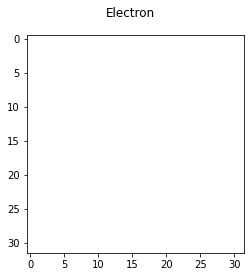

MovieWriter ffmpeg unavailable; using Pillow instead.


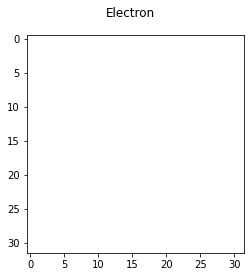

MovieWriter ffmpeg unavailable; using Pillow instead.


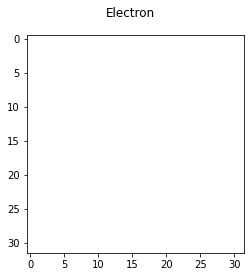

MovieWriter ffmpeg unavailable; using Pillow instead.


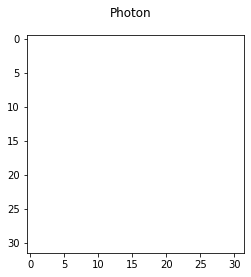

MovieWriter ffmpeg unavailable; using Pillow instead.


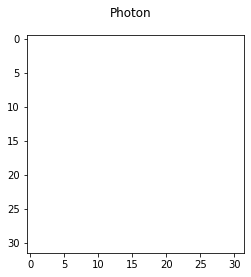

MovieWriter ffmpeg unavailable; using Pillow instead.


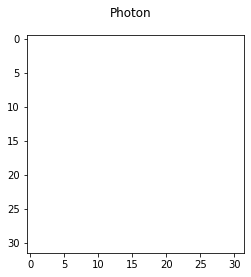

MovieWriter ffmpeg unavailable; using Pillow instead.
usage: mv [-f | -i | -n] [-v] source target
       mv [-f | -i | -n] [-v] source ... directory


In [ ]:
#pic.animate(X_e_test,y_test,time_bins,images=range(-3,3))

In [ ]:
input_img = Input(shape=(maxframes, 32, 32, 1))
conv3d_1 = Conv3D()
maxpool3d_1 = MaxPooling3D()(timedist3d_1)
timedist3d_2 = pic.TimeDistributed_Conv(maxpool3d_1,kernel_size=2)
maxpool3d_2 = MaxPooling3D()(timedist3d_2)
flatten_1 = Flatten()(maxpool3d_2)
dense_1 = Dense(200,activation='relu')(flatten_1)
dropout_1 = Dropout(0.2)(dense_1)
output = Dense(2, activation='softmax')(dropout_1)

model = Model([input_img],output)
plot_model(model,show_shapes=True,to_file='timedist3d_5.png')
os.system('mv *.png Models/')
#model.summary()


0

In [150]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=lr_init),metrics=['accuracy'])

In [151]:
history = model.fit(
    X_e_train, y_b_train,
    validation_data=(X_e_valid,y_b_valid),
    epochs=5,
    batch_size=batch_size,
    shuffle=True,
    verbose=1
)

Epoch 1/5
111/128 [=========================>....] - ETA: 41s - loss: 0.6855 - accuracy: 0.5403

In [80]:
pic.plot_history(history)

AttributeError: module 'utils' has no attribute 'plot_history'

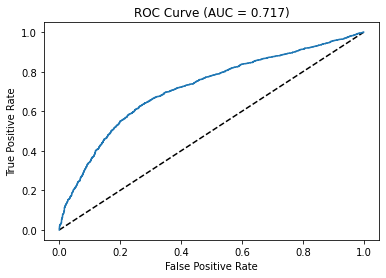

In [16]:
%matplotlib inline
pic.plot_roc(y_b_test[:,0], model.predict(X_e_test)[:,0])

In [17]:
history = model.fit(
    X_e_train, y_b_train,
    validation_data=(X_e_valid,y_b_valid),
    epochs=5,
    batch_size=batch_size,
    shuffle=True,
    verbose=1
)

Epoch 1/5
128/128 [==============================] - 1653s 13s/step - loss: 0.6215 - accuracy: 0.6632 - val_loss: 0.6852 - val_accuracy: 0.5774
Epoch 2/5
 40/128 [========>.....................] - ETA: 20:43 - loss: 0.6148 - accuracy: 0.6695

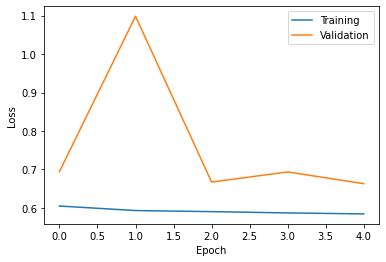

In [ ]:
pic.plot_history(history)

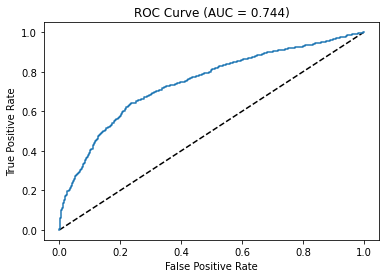

In [ ]:
%matplotlib inline
pic.plot_roc(y_b_test[:,0], model.predict(X_e_test)[:,0])